# Customer Segmentation using RFM Analysis

### Project by : Neha Kumari (Student ID: 0824764)

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [3]:
# read in the json files
portfolio_copy = pd.read_json('portfolio.json', orient='records', lines=True)
profile_copy = pd.read_json('profile.json', orient='records', lines=True)
transcript_copy = pd.read_json('transcript.json', orient='records', lines=True)

### Dataset Overview:

The data is distributed across three files:

### portfolio.json:
**id (string):** Unique offer identifier.

**offer_type (string):** Type of offer, such as BOGO (Buy One Get One), discount, or informational.

**difficulty (int):** Minimum required spending to complete an offer.

**reward (int):** Reward provided for successfully completing an offer.

**duration (int):** Time the offer remains open, specified in days.

**channels (list of strings):** Communication channels through which the offer is distributed.


### profile.json:
**age (int):** Customer's age.

**became_member_on (int):** Date when the customer became a member.

**gender (str):** Customer's gender

**id (string):** Unique customer identifier.

**income (float):** Customer's income.

### transcript.json:
**event (str):** Type of record, including transactions, offers received, viewed, and completed.

**person (string):** Unique customer identifier.

**time (int):** Time since the start of the test.

**value (dict or array):** Additional details about the event (e.g., offer id, amount spent).

This dataset provides a comprehensive view of customer demographics, offer characteristics, and transactional records, facilitating analysis and insights into customer behavior and interactions with promotional offers.

## Data Preprocessing

### 1. Portfolio

In [4]:
print(portfolio.shape)

(10, 6)


In [5]:
# displaying information about data
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [6]:
portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [7]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [8]:
# checking number of null values in the portfolio dataframe
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [9]:
# One-hot encode 'channels'
channel_dummies = pd.get_dummies(portfolio['channels'].apply(pd.Series).stack()).groupby(level=0).sum()

# One-hot encode 'offer_type'
offer_type_dummies = pd.get_dummies(portfolio['offer_type'])

# Concatenate the one-hot encoded columns to the original DataFrame
portfolio = pd.concat([portfolio, channel_dummies, offer_type_dummies], axis=1)


portfolio.head()


,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0


In [10]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0


In [11]:
portfolio.columns

Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'id',
       'email', 'mobile', 'social', 'web', 'bogo', 'discount',
       'informational'],
      dtype='object')

### 2. Profile

In [12]:
print(profile.shape)

(17000, 5)


In [13]:
# displaying information about data
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [14]:
# creating function to check the duplicate values in all columns
def check_unique_values(dataframe):
    for column in dataframe.columns:
        unique_values_count = dataframe[column].value_counts().sum()
        unique_values = dataframe[column].unique()
        
        print(f"Column: '{column}'")
        print(f"Unique Values: {unique_values}")
        print(f"Count of Unique Values:\n{unique_values_count}\n")


In [15]:
check_unique_values(profile)

Column: 'gender'
Unique Values: [None 'F' 'M' 'O']
Count of Unique Values:
14825

Column: 'age'
Unique Values: [118  55  75  68  65  58  61  26  62  49  57  40  64  78  42  56  33  46
  59  67  53  22  96  69  20  45  54  39  41  79  66  29  44  63  36  76
  77  30  51  27  73  74  70  89  50  90  60  19  72  52  18  71  83  43
  47  32  38  34  85  48  35  82  21  24  81  25  37  23 100  28  84  80
  87  86  94  31  88  95  93  91  92  98 101  97  99]
Count of Unique Values:
17000

Column: 'id'
Unique Values: ['68be06ca386d4c31939f3a4f0e3dd783' '0610b486422d4921ae7d2bf64640c50b'
 '38fe809add3b4fcf9315a9694bb96ff5' ... '01d26f638c274aa0b965d24cefe3183f'
 '9dc1421481194dcd9400aec7c9ae6366' 'e4052622e5ba45a8b96b59aba68cf068']
Count of Unique Values:
17000

Column: 'became_member_on'
Unique Values: [20170212 20170715 20180712 ... 20140421 20140605 20130922]
Count of Unique Values:
17000

Column: 'income'
Unique Values: [    nan 112000. 100000.  70000.  53000.  51000.  57000.  46000.  7100

Based on the above output, we can see that gender column has None values and income column has Nan, which needs to be fixed before analysis. Moreover, data type of column "Became member on" is incorrect. It is present as integer instead of datetime.

In [16]:
# correcting data type of became_member_on column
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

# filling empty genders
profile['gender'] = profile['gender'].fillna('NA')

print('Unique genders:')
print(profile['gender'].unique())

#profile['income_na'] = profile['income'].isna().astype(int)
profile['income'] = profile['income'].fillna(profile['income'].mean())

print('\nDescriptive stats for age and income:')
print(profile.describe())

Unique genders:
['NA' 'F' 'M' 'O']

Descriptive stats for age and income:
                age         income
count  17000.000000   17000.000000
mean      62.531412   65404.991568
std       26.738580   20169.288288
min       18.000000   30000.000000
25%       45.000000   51000.000000
50%       58.000000   65404.991568
75%       73.000000   76000.000000
max      118.000000  120000.000000


In [17]:
profile.head(5)

,gender,age,id,became_member_on,income
0,NA,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.000000
2,NA,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,65404.991568
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.000000
4,NA,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,65404.991568


In [18]:
profile.describe()

,age,income
count,17000.000000,17000.000000
mean,62.531412,65404.991568
std,26.738580,20169.288288
min,18.000000,30000.000000
25%,45.000000,51000.000000
50%,58.000000,65404.991568
75%,73.000000,76000.000000
max,118.000000,120000.000000


In [19]:
profile.columns

Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

### 3. Transcript

In [20]:
print(transcript.shape)

(306534, 4)


In [21]:
# displaying information about data
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [22]:
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [23]:
# checking number of null values in the profile dataframe
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [24]:
print('Unique event types:')
print(transcript['event'].unique())

print('\nDescriptive stats for time:')
print(transcript.describe())

Unique event types:
['offer received' 'offer viewed' 'transaction' 'offer completed']

Descriptive stats for time:
                time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000


In [25]:
# event dummies
event_dummies = transcript['event'].str.get_dummies()
event_dummies.drop('transaction', axis=1, inplace=True)

transcript = pd.concat([transcript, event_dummies], axis=1)
transcript.rename(columns={'offer completed': 'offer_completed', 'offer received': 'offer_received', 'offer viewed': 'offer_viewed'}, inplace=True)

transcript.head()

,person,event,value,time,offer_completed,offer_received,offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0,1,0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,0,1,0


In [26]:
transactions = transcript.query('event == "transaction"').copy()
transactions['amount'] = transactions['value'].apply(lambda x: list(x.values())[0])
transactions.drop(['value', 'offer_completed', 'offer_received', 'offer_viewed'], axis=1, inplace=True)

offers = transcript.query('event != "transaction"').copy()
offers['offer_id'] = offers['value'].apply(lambda x: list(x.values())[0])
offers.drop(['value'], axis=1, inplace=True)

### Merging three file

In [27]:
transcript.head(1)

,person,event,value,time,offer_completed,offer_received,offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0,1,0


In [28]:
portfolio.head(1)

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0


In [29]:
profile.head(1)

,gender,age,id,became_member_on,income
0,NA,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568


In [30]:
offers = offers.merge(profile, left_on='person', right_on='id')
offers = offers.merge(portfolio, left_on='offer_id', right_on='id')
offers.drop(['id_x', 'id_y'], axis=1, inplace=True)
offers.set_index('offer_id', inplace=True)
offers.head(2)

,person,event,time,offer_completed,offer_received,offer_viewed,gender,age,became_member_on,income,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
offer_id,,,,,,,,,,,,,,,,,,,,,
9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,F,75,2017-05-09,100000.0,...,5,7,bogo,1,1,0,1,1,0,0
9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,0,0,1,F,75,2017-05-09,100000.0,...,5,7,bogo,1,1,0,1,1,0,0


In [31]:
offers.columns

Index(['person', 'event', 'time', 'offer_completed', 'offer_received',
       'offer_viewed', 'gender', 'age', 'became_member_on', 'income', 'reward',
       'channels', 'difficulty', 'duration', 'offer_type', 'email', 'mobile',
       'social', 'web', 'bogo', 'discount', 'informational'],
      dtype='object')

In [32]:
transactions = transactions.merge(profile, left_on='person', right_on='id')
transactions.drop(['event'], axis=1, inplace=True)
transactions.head(2)

,person,time,amount,gender,age,id,became_member_on,income
0,02c083884c7d45b39cc68e1314fec56c,0,0.83,F,20,02c083884c7d45b39cc68e1314fec56c,2016-07-11,30000.0
1,02c083884c7d45b39cc68e1314fec56c,6,1.44,F,20,02c083884c7d45b39cc68e1314fec56c,2016-07-11,30000.0


In [33]:
profile = profile.query('age <= 99')
offers = offers.query('age <= 99')
transactions = transactions.query('age <= 99')

In [34]:
transactions.describe()

,time,amount,age,income
count,123802.000000,123802.000000,123802.000000,123802.000000
mean,381.255941,13.990337,52.654384,61831.012423
std,201.815431,31.767386,17.838467,20656.130481
min,0.000000,0.050000,18.000000,30000.000000
25%,210.000000,3.660000,39.000000,46000.000000
50%,402.000000,10.790000,54.000000,60000.000000
75%,552.000000,19.120000,65.000000,74000.000000
max,714.000000,1062.280000,99.000000,120000.000000


In [35]:
offers.reset_index(inplace=True)
# the same offer can be received and viewed multiple times
offers[offers.duplicated(subset=['offer_id', 'person'], keep=False)].head()

,offer_id,person,event,time,offer_completed,offer_received,offer_viewed,gender,age,became_member_on,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,1,0,F,75,2017-05-09,...,5,7,bogo,1,1,0,1,1,0,0
1,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,0,0,1,F,75,2017-05-09,...,5,7,bogo,1,1,0,1,1,0,0
2,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,1,0,0,F,75,2017-05-09,...,5,7,bogo,1,1,0,1,1,0,0
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,e2127556f4f64592b11af22de27a7932,offer received,408,0,1,0,M,68,2018-04-26,...,5,7,bogo,1,1,0,1,1,0,0
4,9b98b8c7a33c4b65b9aebfe6a799e6d9,e2127556f4f64592b11af22de27a7932,offer viewed,420,0,0,1,M,68,2018-04-26,...,5,7,bogo,1,1,0,1,1,0,0


#### Recency, Frequency and Monetary

In [36]:
from lifetimes.utils import summary_data_from_transaction_data
# time to Datetime
transactions['datetime'] = transactions['time'].apply(lambda x: pd.Timestamp('2000-01-01T12') + pd.Timedelta(hours=x))
transactions.head()

rf = summary_data_from_transaction_data(transactions, 'person', 'datetime', monetary_value_col='amount')
rf.drop('T', axis=1, inplace=True)

profile.rename({'id': 'person'}, axis=1, inplace=True)
profile.set_index('person', inplace=True)

customers = profile.join(rf)
customers.head()

,gender,age,became_member_on,income,frequency,recency,monetary_value
person,,,,,,,
0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0,2.0,21.0,27.750000
78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0,5.0,16.0,24.320000
e2127556f4f64592b11af22de27a7932,M,68,2018-04-26,70000.0,1.0,10.0,18.420000
389bc3fa690240e798340f5a15918d5c,M,65,2018-02-09,53000.0,2.0,22.0,13.445000
2eeac8d8feae4a8cad5a6af0499a211d,M,58,2017-11-11,51000.0,3.0,15.0,4.433333


In [37]:
def age_demographics(df):
    bins = [18, 30, 40, 50, 60, 70, 120] # bins for grouped data
    labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+'] # labels of grouped data
    df['age_range'] = pd.cut(df.age, bins, labels=labels, include_lowest=True) # separates them into bins and labels them
    
    return df.head()

def income_demographics(df):
    bins = [10000, 30000, 50000, 70000, 90000, 100000, 120000] # bins for grouped data
    labels = ['\$30,000 and below', '\$31,000 - $50,000', '\$51,000 - $70,000', '\$71,000 - $90,000', "\$91,000 - $110,000", '$111,000+'] # labels of grouped data
    df['income_range'] = pd.cut(df.income, bins, labels=labels, include_lowest=True) # separates them into bins and labels them
    
    return df.head()

# Apply both functions to relevant dataframes
age_demographics(customers)
income_demographics(customers)

,gender,age,became_member_on,income,frequency,recency,monetary_value,age_range,income_range
person,,,,,,,,,
0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0,2.0,21.0,27.750000,50-59,"$111,000+"
78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0,5.0,16.0,24.320000,70+,"\$91,000 - $110,000"
e2127556f4f64592b11af22de27a7932,M,68,2018-04-26,70000.0,1.0,10.0,18.420000,60-69,"\$51,000 - $70,000"
389bc3fa690240e798340f5a15918d5c,M,65,2018-02-09,53000.0,2.0,22.0,13.445000,60-69,"\$51,000 - $70,000"
2eeac8d8feae4a8cad5a6af0499a211d,M,58,2017-11-11,51000.0,3.0,15.0,4.433333,50-59,"\$51,000 - $70,000"


In [38]:
customers.columns

Index(['gender', 'age', 'became_member_on', 'income', 'frequency', 'recency',
       'monetary_value', 'age_range', 'income_range'],
      dtype='object')

## Exploratory Data Analysis

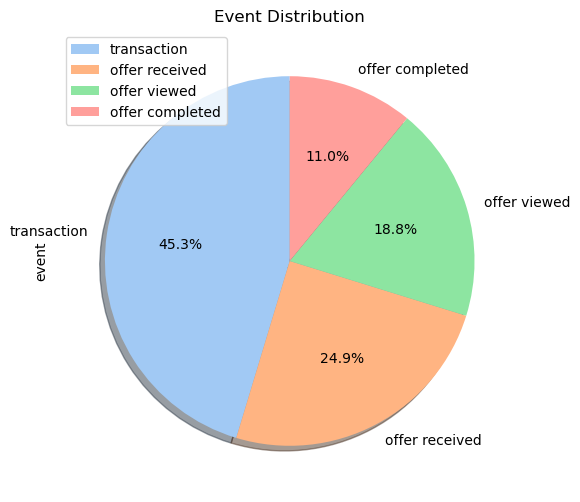

In [39]:
# Set the pastel color palette
sns.set_palette(sns.color_palette("pastel"))

# Plot the event distribution
plt.figure(figsize=(8, 6))
transcript['event'].value_counts().plot(kind='pie',
                                        autopct='%1.1f%%',
                                        shadow=True,
                                        startangle=90)
plt.title("Event Distribution")
plt.legend()
plt.show()

The pie chart represents the distribution of different types of events. The largest segment is "transaction" at 45.3%, followed by "offer received" at 24.9%, "offer viewed" at 18.8%, and the smallest segment is "offer completed" at 11.0%. This suggests that not all offers received are viewed or completed.

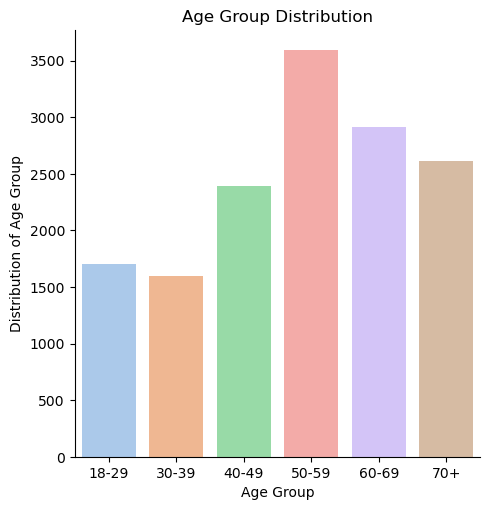

In [40]:
sns.catplot(data=customers, x="age_range", kind="count")
plt.ylabel("Distribution of Age Group")
plt.xlabel("Age Group")
plt.title("Age Group Distribution")
plt.show()

The bar chart illustrates customers distribution based on age for those who received offers, showing the number of customers within each age group. It suggests that offers are most frequently accepted or targeted at customers in the 50-59 age range, followed by those aged 60-69.

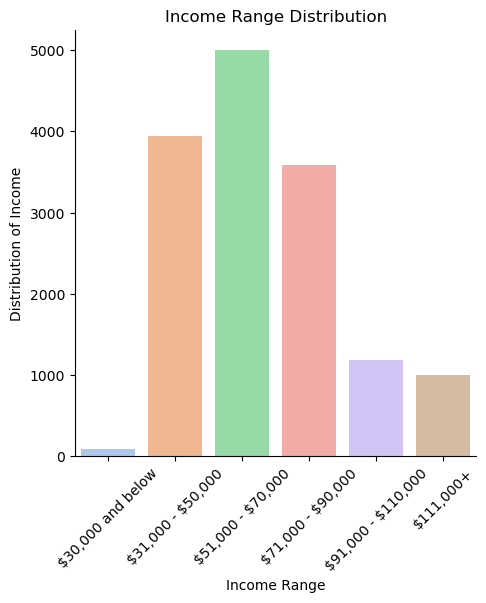

In [41]:
sns.catplot(data=customers, x="income_range", kind="count")
plt.ylabel("Distribution of Income")
plt.xlabel("Income Range")
plt.title("Income Range Distribution")
plt.xticks(rotation=45)
plt.show()

The bar chart represents the distribution of income among customers who have received offers. It categorizes customers into various income ranges, showing that the highest concentration of customers falls within the $51,000-$70,000 range, indicating this is the most common income bracket among those targeted or responsive to offers.

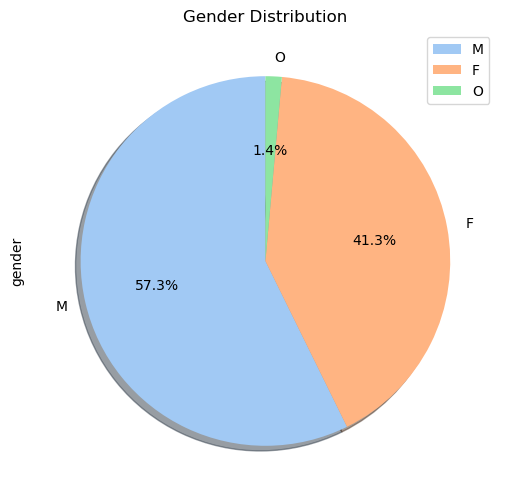

In [42]:
plt.figure(figsize=(8, 6))
customers['gender'].value_counts().plot(kind='pie',
                                        figsize=(8,6),
                                        autopct='%1.1f%%',
                                        shadow = True,
                                        startangle=90)
plt.title("Gender Distribution")
plt.legend()
plt.show()

The pie chart shows the gender distribution of customers who received offers, with males (M) making up 57.3%, females (F) 41.3%, and others (O) a small slice at 1.4%. This indicates a majority of the offers were received by male customers.

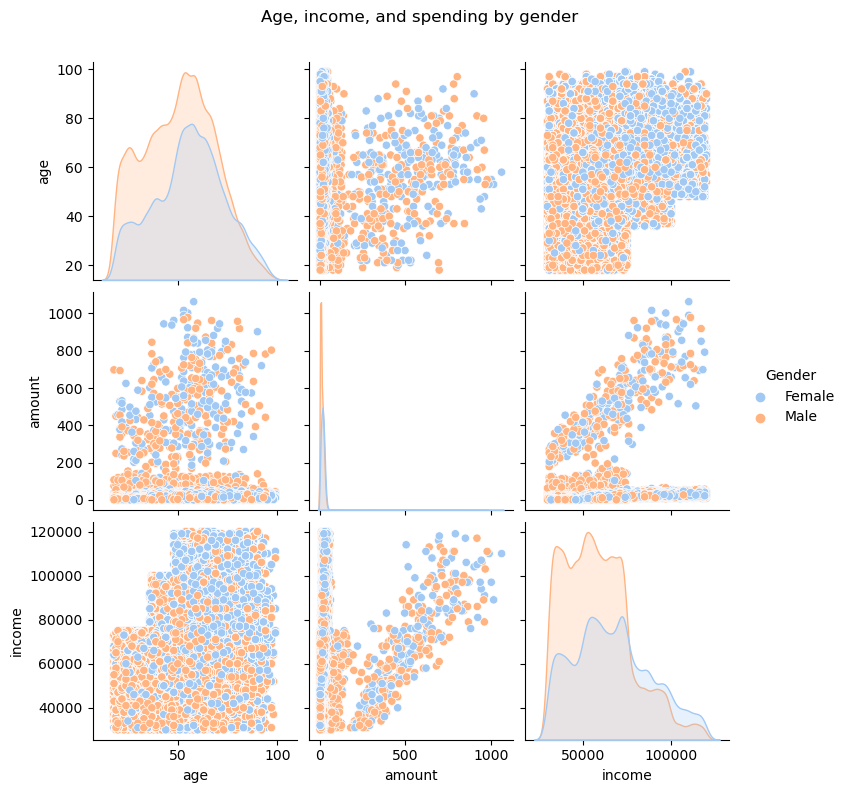

In [43]:
df = transactions[['gender', 'age', 'amount', 'income']].query('gender in ["F", "M"]')

df.rename(columns={'gender': 'Gender'}, inplace=True)
df['Gender'] = df['Gender'].map({'M': 'Male', 'F': 'Female'})

g = sns.pairplot(df, hue='Gender')
g.fig.suptitle("Age, income, and spending by gender", y=1.05)

plt.show()


The pair plot shows relationships between age, income, and spending (amount) by gender, with blue representing female and orange male. Diagonal plots are density estimates for each gender per variable. There's a diverse age and income spread with no clear gender dominance. Spending appears moderately correlated with income, especially for males.
The plots indicate some degree of positive correlation between income and spending, and the density plots suggest that the age and income distributions are relatively similar for both genders, with slight variations.

In [44]:
offers.columns

Index(['offer_id', 'person', 'event', 'time', 'offer_completed',
       'offer_received', 'offer_viewed', 'gender', 'age', 'became_member_on',
       'income', 'reward', 'channels', 'difficulty', 'duration', 'offer_type',
       'email', 'mobile', 'social', 'web', 'bogo', 'discount',
       'informational'],
      dtype='object')

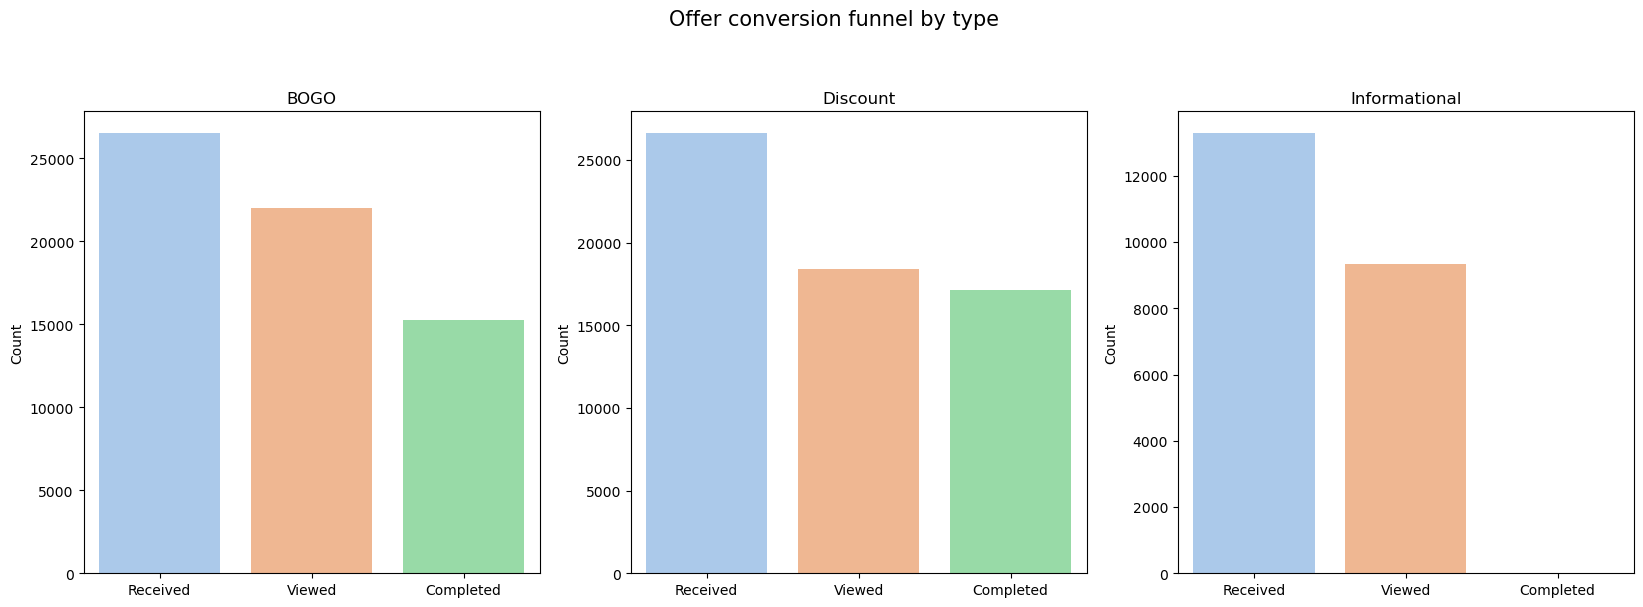

In [45]:
df = offers.groupby(['event', 'offer_type'])['person'].count().reset_index()
df['event'] = pd.Categorical(df['event'], ["offer received", "offer viewed", "offer completed"])
df.sort_values('event', inplace=True)

fig, axs = plt.subplots(ncols=3, figsize=(20, 6))

df['event'] = df['event'].map({'offer received': 'Received', 'offer viewed': 'Viewed', 'offer completed': 'Completed'})

ax = sns.barplot('event', y='person', data=df.query('offer_type == "bogo"'), ci=None, ax=axs[0])
ax.set(xlabel='', ylabel='Count', title='BOGO')

ax = sns.barplot('event', y='person', data=df.query('offer_type == "discount"'),ci=None, ax=axs[1])
ax.set(xlabel='', ylabel='Count', title='Discount')

ax = sns.barplot('event', y='person', data=df.query('offer_type == "informational"'), ci=None, ax=axs[2])
ax.set(xlabel='', ylabel='Count', title='Informational')

fig.suptitle('Offer conversion funnel by type', size=15, y=1.05);

The chart depicts an offer conversion funnel for three types of offers: BOGO (Buy One Get One free), Discount, and Informational. Each funnel shows the number of offers received, viewed, and completed. For BOGO and Discount offers, there's a significant drop-off from received to viewed, and from viewed to completed. Informational offers have a smaller scale but follow a similar trend, with more offers received than viewed, and the least number completed, indicating a loss of potential customers at each stage of the funnel.

## Customer Segmentation using Clustering

In [46]:
rfm_columns = ['frequency', 'recency', 'monetary_value']

# Assuming 'customers' is your DataFrame
rfm_matrix = customers[rfm_columns]

rfm_matrix.head()

,frequency,recency,monetary_value
person,,,
0610b486422d4921ae7d2bf64640c50b,2.0,21.0,27.750000
78afa995795e4d85b5d9ceeca43f5fef,5.0,16.0,24.320000
e2127556f4f64592b11af22de27a7932,1.0,10.0,18.420000
389bc3fa690240e798340f5a15918d5c,2.0,22.0,13.445000
2eeac8d8feae4a8cad5a6af0499a211d,3.0,15.0,4.433333


In [47]:
nan_counts = rfm_matrix.isnull().sum()
print(nan_counts)
print(rfm_matrix.info())

frequency         333
recency           333
monetary_value    333
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14808 entries, 0610b486422d4921ae7d2bf64640c50b to e4052622e5ba45a8b96b59aba68cf068
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frequency       14475 non-null  float64
 1   recency         14475 non-null  float64
 2   monetary_value  14475 non-null  float64
dtypes: float64(3)
memory usage: 978.8+ KB
None


In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the RFM matrix
rfm_normalized = scaler.fit_transform(rfm_matrix)

rfm_normalized

array([[-1.14798317,  0.0510808 ,  0.52189347],
       [-0.35873679, -0.67027983,  0.35928278],
       [-1.41106529, -1.53591259,  0.07957344],
       ...,
       [-0.35873679, -0.23746345, -0.44817647],
       [ 1.4828381 ,  1.0609857 , -0.06999995],
       [-0.88490104,  0.91671357,  1.12587602]])

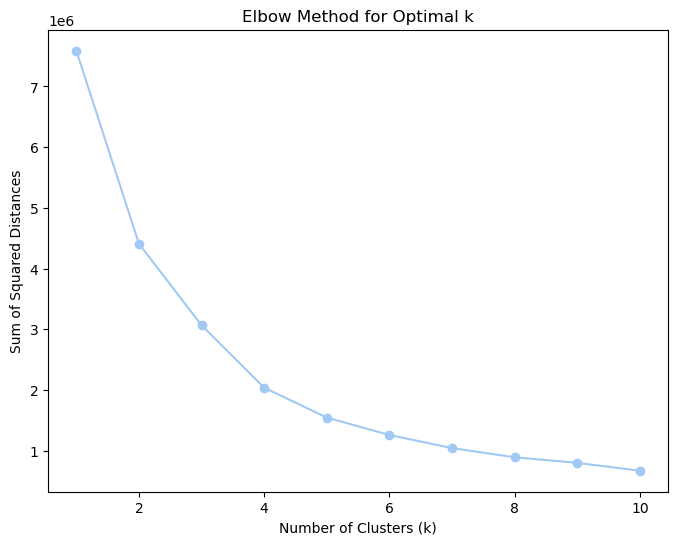

In [49]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming rfm_matrix is your feature matrix with NaN values
# Replace NaN values with zero or any other appropriate method
rfm_matrix_filled = rfm_matrix.fillna(0)

# Initialize a list to store the sum of squared distances (inertia) for different k values
inertia = []

# Define a range of k values (number of clusters) to test
k_values = range(1, 11)

# Loop through each k value and fit KMeans model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_matrix_filled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


The graph illustrates the Elbow Method to determine the optimal number of clusters (k) for k-means clustering. The plot shows the sum of squared distances from each point to its assigned cluster center, which decreases as the number of clusters increases. The "elbow" point, where the rate of decrease sharply changes, suggests the optimal k value; in this case, it appears to be at k=3, after which the curve flattens out.

In [50]:
from sklearn.cluster import KMeans

# Assuming the optimal number of clusters is determined from the elbow method
optimal_k = 3  
# Initialize KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to your data
kmeans.fit(rfm_matrix_filled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your original DataFrame
# (assuming 'customers' is your original DataFrame)
customers['Cluster'] = cluster_labels

# Display the counts of each cluster
cluster_counts = customers['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Display the cluster centers (centroids)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=rfm_matrix_filled.columns)
print("\nCluster Centers:")
print(cluster_centers)


Cluster Counts:
0    7646
1    7054
2     108
Name: Cluster, dtype: int64

Cluster Centers:
   frequency    recency  monetary_value
0   6.332331  19.405179        5.921700
1   6.111426  21.020130       25.073281
2   5.425926  20.388889      186.939128


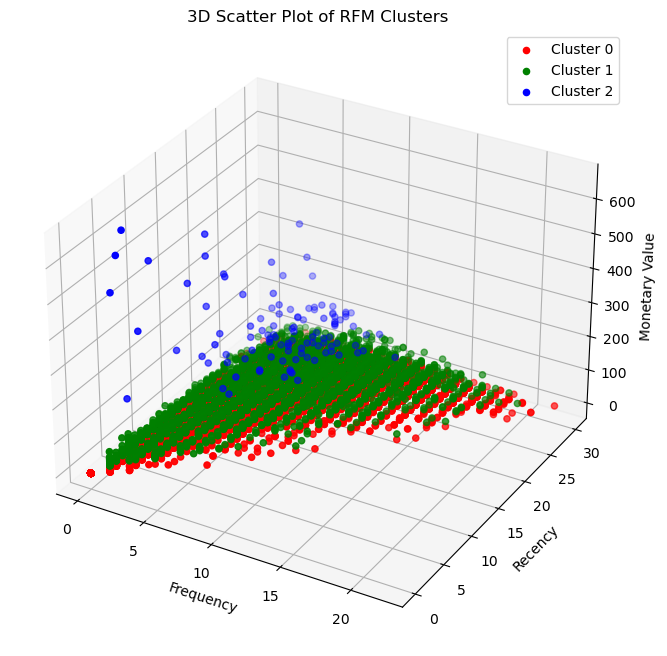

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the color for each cluster
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster, color in colors.items():
    cluster_data = customers[customers['Cluster'] == cluster]
    ax.scatter(cluster_data['frequency'], cluster_data['recency'], cluster_data['monetary_value'], c=color, label=f'Cluster {cluster}')

# Set labels
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary Value')

# Set legend
ax.legend()

# Set title
plt.title('3D Scatter Plot of RFM Clusters')

# Show the plot
plt.show()


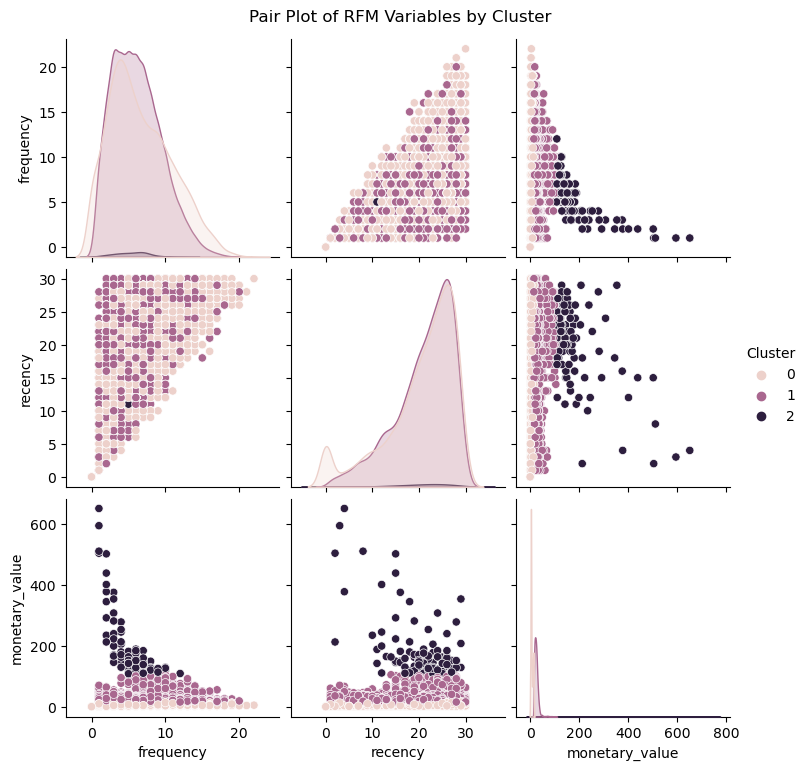

In [52]:
# Set the custom color palette
custom_palette = sns.color_palette(['lightgreen', 'lightcoral', 'lightblue'])

# Use the custom color palette
sns.set_palette(custom_palette)

# Pair plot for RFM variables
sns.pairplot(customers[['frequency', 'recency', 'monetary_value', 'Cluster']], hue='Cluster')
plt.suptitle('Pair Plot of RFM Variables by Cluster', y=1.02)
plt.show()

The image displays a pair plot of RFM (Recency, Frequency, Monetary value) variables segmented into three clusters (0, 1, and 2). The diagonal plots are density distributions for each RFM metric per cluster, indicating the frequency of customers' interactions, how recently they interacted, and how much they spend. The off-diagonal plots are scatter plots that show the relationships between these metrics within each cluster, revealing patterns such as higher frequency and monetary value correlating with lower recency (more recent interaction). 

Cluster 0 tends to show low frequency and monetary value; 

Cluster 1 demonstrates moderate frequency, recency, and monetary value; 

Cluster 2 appears to have higher monetary value but less frequency

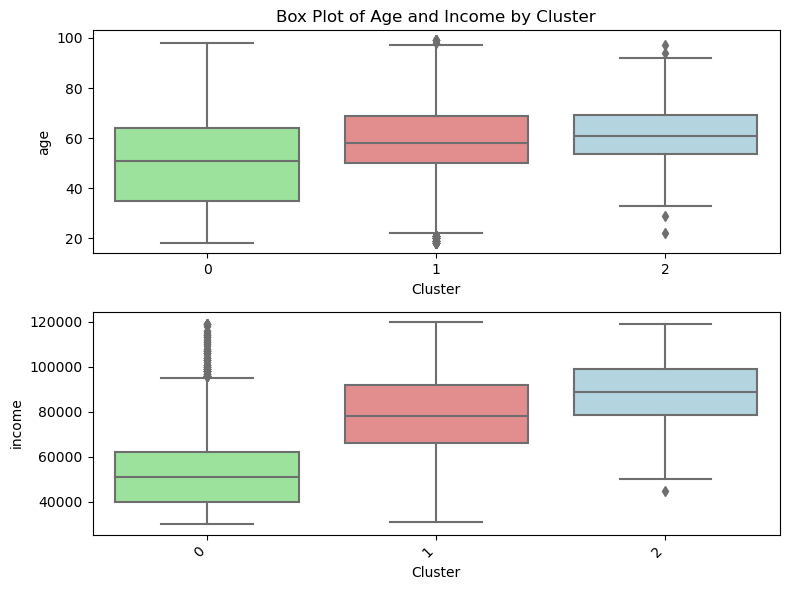

In [53]:
# Box plots for age, income, and other variables
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
for i, column in enumerate(['age', 'income']):
    sns.boxplot(x='Cluster', y=column, data=customers, ax=axes[i])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
axes[0].set_title('Box Plot of Age and Income by Cluster')

plt.tight_layout()
plt.show()

The above chart show two box plots representing the distribution of age and income across three different clusters (0, 1, and 2). In the age box plot, Cluster 0 has a lower median age with a narrower interquartile range, Cluster 1 has a higher median age with more variability, and Cluster 2 has a median age between the other two clusters. The income box plot below shows that Cluster 0 has a lower median income with a wide range, Cluster 1 has the highest median income with outliers indicating variation, and Cluster 2 has a median income higher than Cluster 0 but lower than Cluster 1. This suggests that each cluster may represent different demographic segments based on age and income.

## Conclusion and Recommendation

**Cluster 0:** With a younger age group and lower income, Starbucks might focus on promoting affordable beverage options, such as featured coffee of the week, and digitally-focused promotions through mobile apps and social media to engage this tech-savvy demographic. Loyalty programs with student discounts or rewards for frequent purchases could also drive engagement.

**Cluster 1:** Given the higher median age and income, this group may value convenience and premium products. Starbucks could target them with high-end specialty drinks, subscription services for home coffee delivery, and limited-time offers for seasonal beverages. Upscale "Starbucks Reserve" locations might also appeal to this demographic, emphasizing a premium experience.

**Cluster 2:** With a moderate income and median age, this cluster may appreciate a balance of quality and value. Starbucks could offer this group bundle deals, such as breakfast combos or pairings of coffee with snacks. Marketing for this cluster can highlight Starbucks' sustainability efforts and community involvement, which might resonate well with a socially conscious middle-aged demographic.

For Starbucks' decision-makers, understanding these customer segments can guide not only marketing campaigns but also store location planning, menu design, and service enhancements to cater to the specific preferences and expectations of each customer profile.